Exercise-1

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

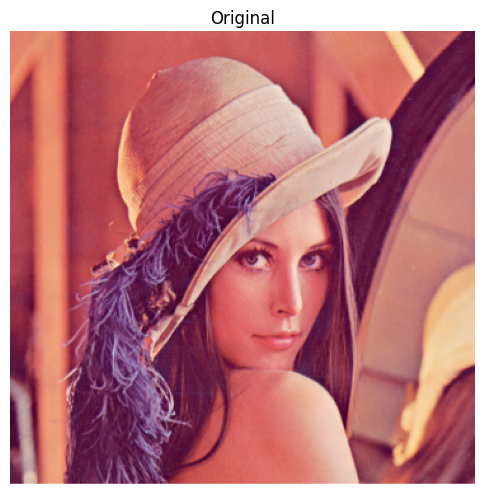

In [ ]:
#Read and Dispaly the Image
image_path= '/content/drive/MyDrive/AI & ML/unnamed (1).png'
image= Image.open(image_path)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original")
plt.axis("off")
plt.show()

In [ ]:
image_array= np.array(image)

<function matplotlib.pyplot.show(close=None, block=None)>

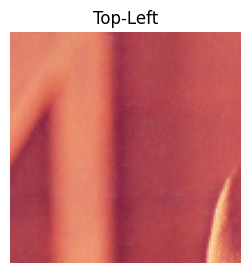

In [ ]:
top_left_corner = image_array [:100, :100]
plt.figure(figsize=(3,3))
plt.imshow(top_left_corner)
plt.title("Top-Left")
plt.axis("off")
plt.show

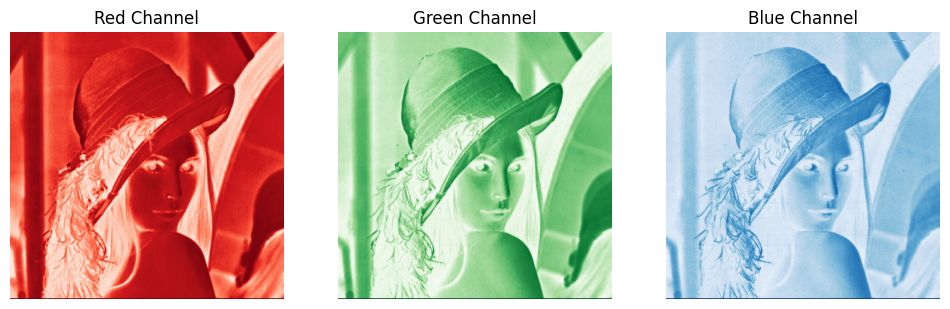

In [ ]:
r_channel = image_array[:, :, 0]  # Red channel
g_channel = image_array[:, :, 1]  # Green channel
b_channel = image_array[:, :, 2]  # Blue channel

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(g_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(b_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()


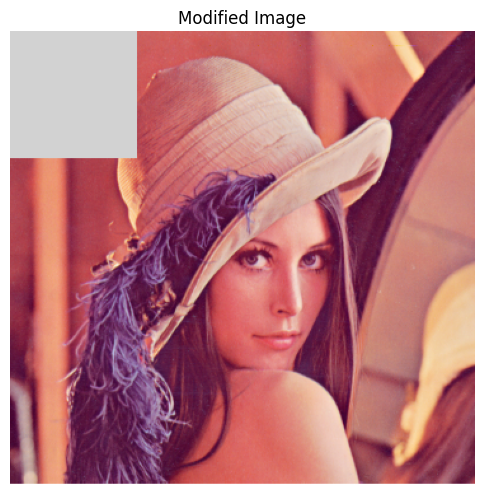

In [ ]:
modifi_image= image_array.copy()
modifi_image[:100, :100]= 210

plt.figure(figsize=(6, 6))
plt.imshow(modifi_image)
plt.title("Modified Image")
plt.axis("off")
plt.show()

Exercise-2

In [13]:
def load_and_display_image(image_path):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    plt.imshow(img, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()
    return img



In [23]:
def extract_middle_section(img, section_height=150):
    img_array = np.array(img)
    h, w = img_array.shape  # Corrected line
    start = (h - section_height) // 2
    cropped_img = img_array[start:start + section_height, :]
    plt.imshow(cropped_img, cmap='gray')
    plt.title("Middle 150 Pixel Section")
    plt.axis("off")
    plt.show()
    return cropped_img


In [15]:
def apply_threshold(img, threshold=100):
  img_array = np.array(img)
  binary_img = np.where(img_array < threshold, 0, 255).astype(np.uint8)
  plt.imshow(binary_img, cmap= 'gray')
  plt.title("Binary Image")
  plt.axis("off")
  plt.show()
  return Image.fromarray(binary_img)

In [16]:
def rotate_image(img):
  rotated_img = img.rotate(-90, expand=True)
  plt.imshow(rotated_img, cmap= 'gray')
  plt.title("Rotated")
  plt.axis("off")
  plt.show()
  return rotated_img



In [25]:
def convert_to_rgb(img):
    rgb_img = Image.merge("RGB", (img, img, img))  # Convert grayscale to RGB
    plt.imshow(rgb_img)
    plt.title("Converted to RGB")
    plt.axis("off")
    plt.show()
    return rgb_img



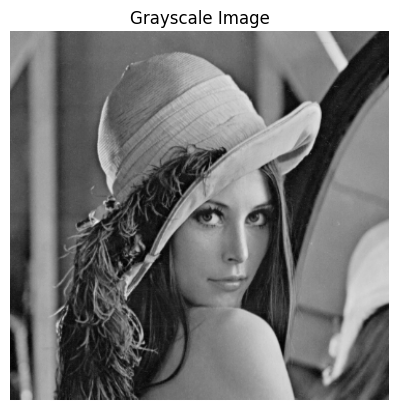

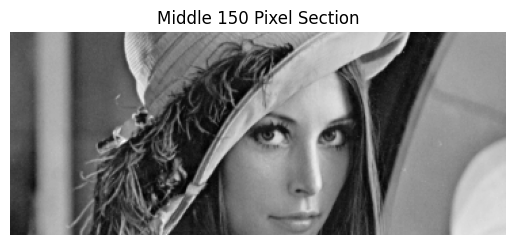

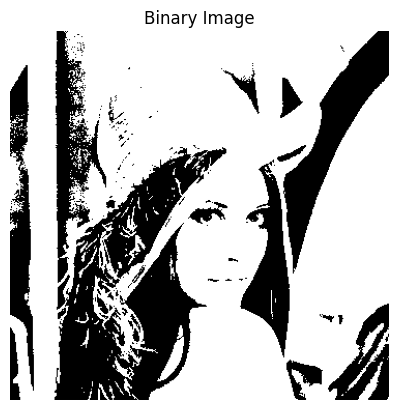

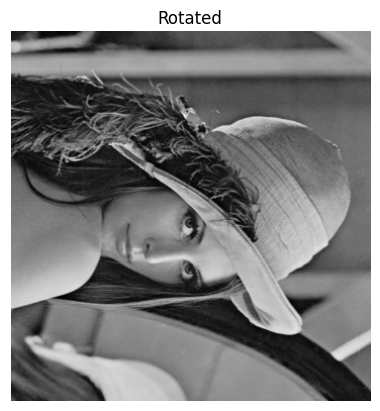

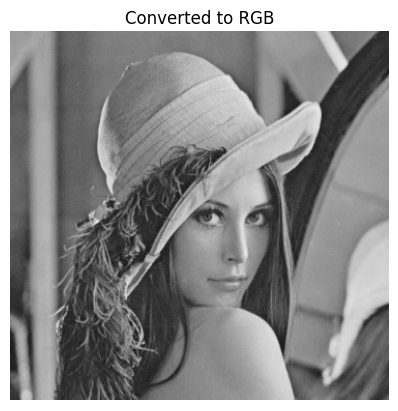

In [26]:
image_path = '/content/drive/MyDrive/AI & ML/unnamed (1).png'
img = load_and_display_image(image_path)
cropped_img = extract_middle_section(img)
binary_img = apply_threshold(img)
rotated_img = rotate_image(img)
rgb_img = convert_to_rgb(img)


Exercise-3

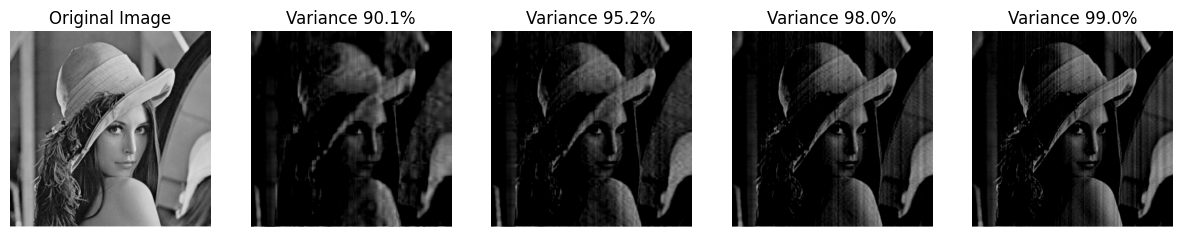

In [45]:

def load_and_preprocess_image(image_path):
    """Load an image, convert to grayscale, and standardize it."""
    img = Image.open(image_path).convert("L")
    img_array = np.array(img, dtype=np.float32)

    img_mean = np.mean(img_array)
    standardized_data = img_array - img_mean

    return standardized_data, img_array.shape, img

def compute_covariance_matrix(data):
    """Compute the covariance matrix of the standardized image."""
    return np.cov(data, rowvar=False)

def compute_eigen_decomposition(cov_matrix):
    """Compute eigenvalues and eigenvectors and sort them in descending order."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    return eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

def select_principal_components(eigenvalues, eigenvectors, variance_threshold):
    """Select the principal components based on the explained variance threshold."""
    cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    return eigenvectors[:, :num_components], num_components, cumulative_variance

def reconstruct_image(data, eigenvectors, original_shape):
    """Reconstruct the image using the selected principal components."""
    lower_dimensional_representation = np.dot(data, eigenvectors)  # Projection
    reconstructed_image = np.dot(lower_dimensional_representation, eigenvectors.T)

    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    return reconstructed_image.reshape(original_shape)

def display_results(original, reconstructed_images, variance_values):
    """Display the original and reconstructed images."""
    fig, axes = plt.subplots(1, len(reconstructed_images) + 1, figsize=(15, 5))

    # Convert original image to displayable format
    original_display = np.array(original, dtype=np.uint8)

    axes[0].imshow(original_display, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    for i, (reconstructed, var) in enumerate(zip(reconstructed_images, variance_values)):
        axes[i + 1].imshow(reconstructed, cmap='gray')
        axes[i + 1].set_title(f"Variance {var * 100:.1f}%")
        axes[i + 1].axis("off")

    plt.show()

def pca_image_compression(image_path, variance_thresholds=[0.90, 0.95, 0.98, 0.99]):
    """Performs PCA image compression at different variance thresholds."""
    data, original_shape, original_img = load_and_preprocess_image(image_path)
    cov_matrix = compute_covariance_matrix(data)
    eigenvalues, eigenvectors = compute_eigen_decomposition(cov_matrix)

    reconstructed_images = []
    selected_variances = []

    for var_thresh in variance_thresholds:
        selected_eigenvectors, num_components, cum_var = select_principal_components(eigenvalues, eigenvectors, var_thresh)
        reconstructed = reconstruct_image(data, selected_eigenvectors, original_shape)
        reconstructed_images.append(reconstructed)
        selected_variances.append(cum_var[num_components - 1])

    display_results(original_img, reconstructed_images, selected_variances)


image_path = '/content/drive/MyDrive/AI & ML/unnamed (1).png'
pca_image_compression(image_path)
